<a href="https://colab.research.google.com/github/barauna-lo/Code_Library/blob/main/GPA_HandsOn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --force-reinstall git+https://github.com/rsautter/GPA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/GPA to /tmp/pip-req-build-qg5c7_wk
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/GPA /tmp/pip-req-build-qg5c7_wk
  Resolved https://github.com/rsautter/GPA to commit 254e1c401441b7abb101456786e4d64176a68b42
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for GPA: filename=GPA-3.5-cp310-cp310-linux_x86_64.whl size=1493985 sha256=e00fd90cc360c26146a5bbe22f3263dba858356cd61dd9c92645682b9fe465d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-q70fyjv7/wheels/8b/55/b6/4d841dd9660865970155bd3c405b33625122913220d28e682e
Successfully built GPA


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from GPA import GPA
import tqdm as tqdm
import pandas as pd

# 1. Gradient Pattern Analysis (GPA)


The GPA technique was develop in [Cython](https://cython.org/), a library that converts Python code to C in order to improve the computational performance. The source code is public available [here](https://github.com/rsautter/GPA).

In the code below, a GPA object is being created. The constructor method of the GPA class takes the tolerance parameter as input, which in this example is set to 3%.

In [ ]:
ga = GPA(0.03)

# 2. Fundamental Matrices

Fundamental matrices are the simplest case study, which are defined by 3x3 elements.  

In [ ]:
laminar = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

In [ ]:
symmetrical1 = np.array([
    [1,2,1],
    [2,5,2],
    [1,2,1]
])

In [ ]:
symmetrical2 = np.array([
    [5,1,5],
    [1,0,1],
    [5,1,5]
])

In [ ]:
quasiSymmetrical = np.array([
    [1,2,1.03],
    [2.01,5,2],
    [1,2.07,0.98]
])

In [ ]:
shuffled = laminar.copy().ravel()
np.random.shuffle(shuffled)
shuffled = shuffled.reshape(3,3)
shuffled

array([[3, 5, 2],
       [1, 4, 6],
       [8, 7, 9]])

The code below generates a plot of all fundamental matrices. It's worth noting that the quasisymmetric example is very similar to Symmetrical1. However, the GPA technique is able to detect even subtle fluctuations in the pattern.

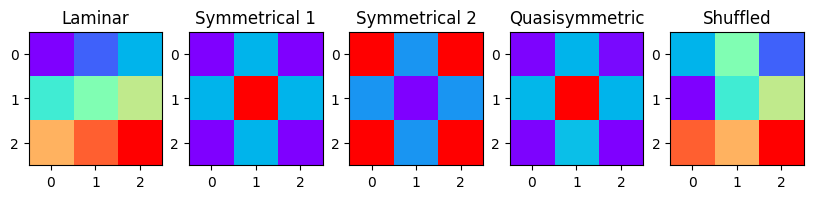

In [ ]:
plt.figure(figsize=(10,2))
plt.subplot(1,5,1)
plt.imshow(laminar, cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Laminar")

plt.subplot(1,5,2)
plt.imshow(symmetrical1, cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Symmetrical 1")

plt.subplot(1,5,3)
plt.imshow(symmetrical2, cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Symmetrical 2")

plt.subplot(1,5,4)
plt.imshow(quasiSymmetrical, cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Quasisymmetric")

plt.subplot(1,5,5)
plt.imshow(shuffled, cmap='rainbow')
plt.title("Shuffled")
plt.xticks([0,1,2])
plt.yticks([0,1,2])

plt.show()

The evaluation method GPA requires an Numpy vector of the type **float** as input. In the following code, we are converting the type of vector from **int** to **float**.

In [ ]:
laminar = laminar.astype(float)
symmetrical1 = symmetrical1.astype(float)
symmetrical2 = symmetrical2.astype(float)
quasiSymmetrical = quasiSymmetrical.astype(float)
shuffled = shuffled.astype(float)

The method **\_\_cal\_\_()** is a special in Python objects, as it can simplify the notation of the most used method.
This method has the following parameters:



*   ***mat*** - the input matrix (numpy array with elements of type float).
*   ***gx***,***gy*** - input vector lattice (numpy array with elements of type float).
*   ***moment*** - List of Gradient Moments ("G1","G1C","G2","G3", and "G4"). Default: "G2".
*   ***symmetrycalGrad*** - determines if the Gradient Moment will be measured on symmetrical part, asymmetrical part, or the full lattice ("S","A","F"). Default: "A".

If the ***mat*** variable is specified, then ***gx*** and ***gy*** will not be used.





In [ ]:
ga(laminar, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.19526214587563495,
 'G1C': 0.7777777777777778,
 'G2': 0.4999999999999999,
 'G3': 0.7587841046115789,
 'G4': (1.879772282303151+1.6894873043266947j)}

In [ ]:
ga(symmetrical1, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.0, 'G1C': 0.0, 'G2': 0.0, 'G3': 0.0, 'G4': 0j}

In [ ]:
ga(symmetrical2, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.0, 'G1C': 0.0, 'G2': 0.0, 'G3': 0.0, 'G4': 0j}

In [ ]:
ga(quasiSymmetrical, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.2044965459699355,
 'G1C': 0.25,
 'G2': 0.4977858457773628,
 'G3': 0.25006112592517393,
 'G4': (1.090979818834745-0.04346464096261893j)}

In [ ]:
ga(shuffled, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.2666675700027462,
 'G1C': 1.1111111111111112,
 'G2': 0.6651112274731259,
 'G3': 0.8424401846251814,
 'G4': (1.681817752860952+1.2109308368161473j)}

## 2.1 Gradient Lattice Visualization

Several variables can be accessed from the object. In the following code, the gradient lattice is retrieved from the object.

In [ ]:
_ = ga(laminar)
gx,gy = ga.getDx(),ga.getDy()

In [ ]:
gx

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

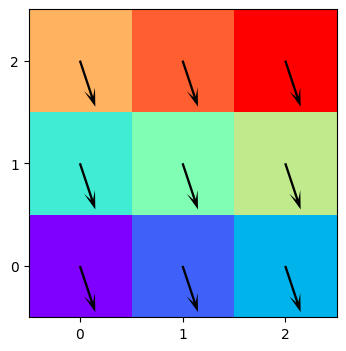

In [ ]:
plt.figure(figsize=(4,4))
plt.quiver(gx,-gy,scale = 20,headwidth=5,headlength=8)
plt.imshow(laminar,origin='lower',cmap='rainbow')
#plt.xlim(-1,3)
#plt.ylim(-1,3)
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.show()

In [ ]:
_ = ga(laminar)
gxl,gyl = ga.getDx(),ga.getDy()
_ = ga(symmetrical1)
gxs1,gys1 = ga.getDx(),ga.getDy()
_ = ga(symmetrical2)
gxs2,gys2 = ga.getDx(),ga.getDy()
_ = ga(quasiSymmetrical)
gxqs,gyqs = ga.getDx(),ga.getDy()
_ = ga(shuffled)
gxsh,gysh = ga.getDx(),ga.getDy()

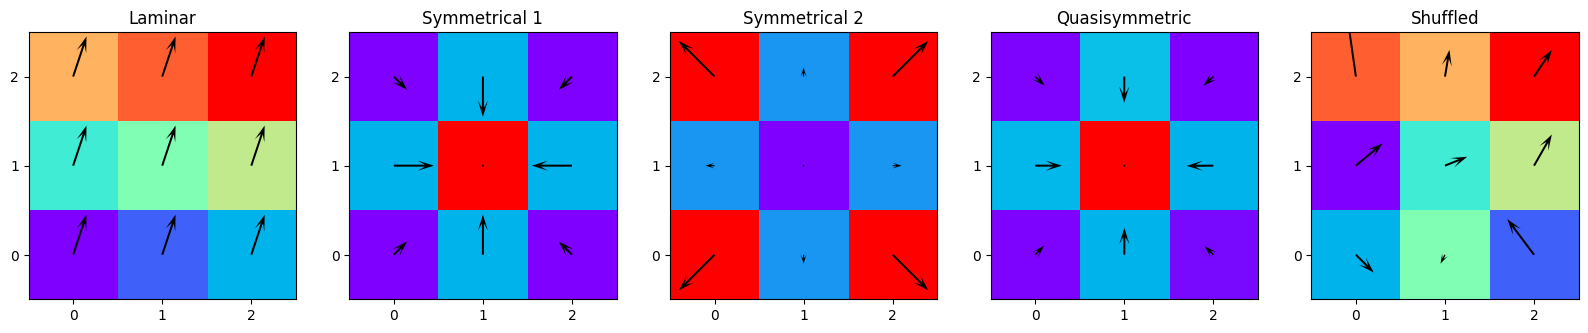

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.quiver(gxl,gyl,scale = 20,headwidth=5,headlength=8)
plt.imshow(laminar,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Laminar")

plt.subplot(1,5,2)
plt.quiver(gxs1,gys1,scale = 20,headwidth=5,headlength=8)
plt.imshow(symmetrical1,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Symmetrical 1")

plt.subplot(1,5,3)
plt.quiver(gxs2,gys2,scale = 30,headwidth=5,headlength=8)
plt.imshow(symmetrical2,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Symmetrical 2")

plt.subplot(1,5,4)
plt.quiver(gxqs,gyqs,scale = 30,headwidth=5,headlength=8)
plt.imshow(quasiSymmetrical,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Quasisymmetric")

plt.subplot(1,5,5)
plt.quiver(gxsh,gysh,scale = 30,headwidth=5,headlength=8)
plt.imshow(shuffled,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Shuffled")

plt.show()

To gain further insight into the metric, we can visualize the vector field classified based on the symmetry property. The following code distinguishes between asymmetrical vectors (plotted in red) and symmetrical ones (plotted in blue).

In [ ]:
_ = ga(quasiSymmetrical)
gxqs,gyqs = ga.getDx(),ga.getDy()
a, s = np.array(ga.asymmetricalP), np.array(ga.symmetricalP)
print("Asymmetrical:")
print(a)
print("Symmetrical:")
print(s)

Asymmetrical:
[[1 0 1]
 [0 0 0]
 [1 0 1]]
Symmetrical:
[[0 1 0]
 [1 0 1]
 [0 1 0]]


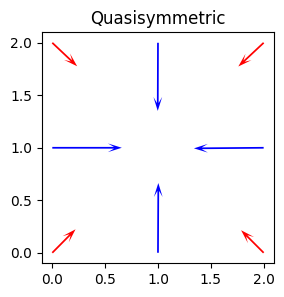

In [ ]:
ax,ay = gxqs.copy(),gyqs.copy()
sx,sy = gxqs.copy(),gyqs.copy()
ax[a==0]=np.nan
ay[a==0]=np.nan
sx[s==0]=np.nan
sy[s==0]=np.nan

plt.figure(figsize=(3,3))
plt.quiver(ax,ay,scale = 10,headwidth=5,headlength=8,color='r')
plt.quiver(sx,sy,scale = 10,headwidth=5,headlength=8,color='b')
plt.title("Quasisymmetric")
plt.show()

## 2.2 Larger Matrices & Delaunay

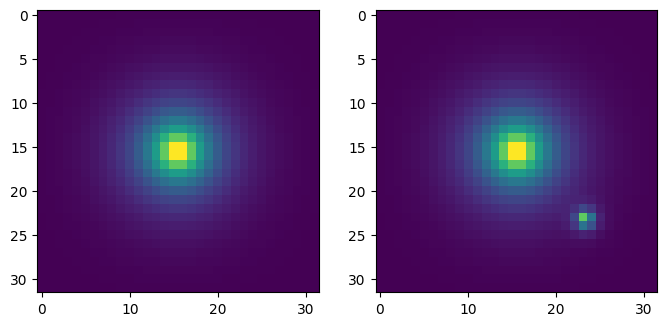

In [ ]:
ga2 = GPA(0.01)
def bell(mux=0.5,muy=0.5,sigma=0.1,size=32):
    x, y = np.meshgrid(np.linspace(0,1,size),np.linspace(0,1,size))
    x,y = x-mux, y-muy
    d = (x**2+y**2)**0.5
    return np.exp(-d/sigma)/(2*np.pi)

m = bell()
m2 = bell()+bell(mux=0.75,muy=0.75,sigma=0.02)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(m)

plt.subplot(1,2,2)
plt.imshow(m2)

plt.show()

In [ ]:
print("Symmetric: ")
print(ga2(m,moment=["G1","G1C","G2","G3", "G4"]))
print("Asymmetric: ")
print(ga2(m2,moment=["G1","G1C","G2","G3", "G4"]))

Symmetric: 
{'G1': 0.0, 'G1C': 0.0, 'G2': 0.0, 'G3': 0.0, 'G4': 0j}
Asymmetric: 
{'G1': 0.14663862793306814, 'G1C': 1.7735849056603774, 'G2': 0.07390293215829738, 'G3': 0.12311294201278028, 'G4': (1.00634740830576+0.23323163052838325j)}


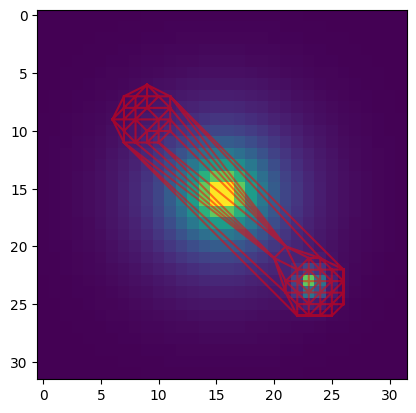

In [ ]:
plt.figure()
tri = ga2.triangles
plt.triplot(ga2.triangulation_points[:,0],ga2.triangulation_points[:,1],tri.simplices,color='r',alpha=0.5)
plt.imshow(m2)
plt.show()

# 3. Stochastic Complex Ginzburg-Landau

The Complex Ginzburg–Landau (CGL) equation is one of the most celebrated nonlinear equations in physics. It is  an important model to study pattern formation since it is able to capture the emergence of complex spatiotemporal patterns from the interaction of a small number of parameters. The system is governed by the equation:

$$ \partial_t A = (1+ib) \nabla^2 A + A  - (1+ic) |A|^2A$$

There are two primary approaches for incorporating noise terms into this equation: additive and multiplicative. These approaches can be described as follows:

$$ \partial_t A = (1+ib) \nabla^2 A + A  - (1+ic) |A|^2A + \sigma \partial_t(\eta_\beta) $$

$$  \partial_t A = (1+ib) \nabla^2 A + A  - (1+ic) |A|^2A + \sigma A \partial_t(\eta_\beta)  $$

We have already integrated the solution for this hands-on. The following cell loads a reduced example.

**More information can be found [here](https://github.com/rsautter/Noisy-Complex-Ginzburg-Landau).

In [ ]:
!wget https://github.com/rsautter/GPA_Tutorial/raw/main/data/add_m32.npy
!wget https://github.com/rsautter/GPA_Tutorial/raw/main/data/mul_m32.npy
!wget https://github.com/rsautter/GPA_Tutorial/raw/main/data/wn_m32.npy

--2023-05-31 20:11:34--  https://github.com/rsautter/GPA_Tutorial/raw/main/data/add_m32.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/data/add_m32.npy [following]
--2023-05-31 20:11:34--  https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/data/add_m32.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55738496 (53M) [application/octet-stream]
Saving to: ‘add_m32.npy’

add_m32.npy         100%[===================>]  53.16M   289MB/s    in 0.2s    

2023-05-31 20:11:36 (289 MB/s) - ‘add_m32.npy’ saved [55738496/55738496]

--2023-05-31 20:11:37--  htt

In [ ]:
import numpy as np

g2Label = pd.read_csv('https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/data/GPA_allCGL.csv')
data = np.load('wn_m32.npy').astype(float)

test = np.arange(2,len(data)-1,3).astype(int)
train = np.arange(0,len(data)-1, 1).astype(int)
train = np.delete(train,test)

c1Test = data[test]
c1Train = data[train]

data = np.load('add_m32.npy').astype(float)
c2Test = data[test]
c2Train = data[train]

print("Train Shape:",c1Train.shape, " =>  Proportion: ",np.round(c1Train.shape[0]/(c1Train.shape[0]+c1Test.shape[0]),2))
print("Test Shape:",c1Test.shape, " =>  Proportion: ",np.round(c1Test.shape[0]/(c1Train.shape[0]+c1Test.shape[0]),2))

Train Shape: (1134, 64, 64)  =>  Proportion:  0.67
Test Shape: (566, 64, 64)  =>  Proportion:  0.33


In [ ]:
data = np.load('wn_m32.npy').astype(float)
withoutNoise = []
for i in tqdm.tqdm(range(len(data))):
  withoutNoise.append(ga(data[i]))

100%|██████████| 1701/1701 [03:58<00:00,  7.13it/s]


In [ ]:
import numpy as np
data = np.load('add_m32.npy').astype(float)
selection = np.linspace(0,len(data)-1, 10).astype(int)
c1 = data[selection]
data = np.load('mul_m32.npy').astype(float)
c2 = data[selection]

In [ ]:
withoutNoise = pd.DataFrame(withoutNoise)

In [ ]:
withoutNoise.to_csv("withoutNoiseG2-32.csv")

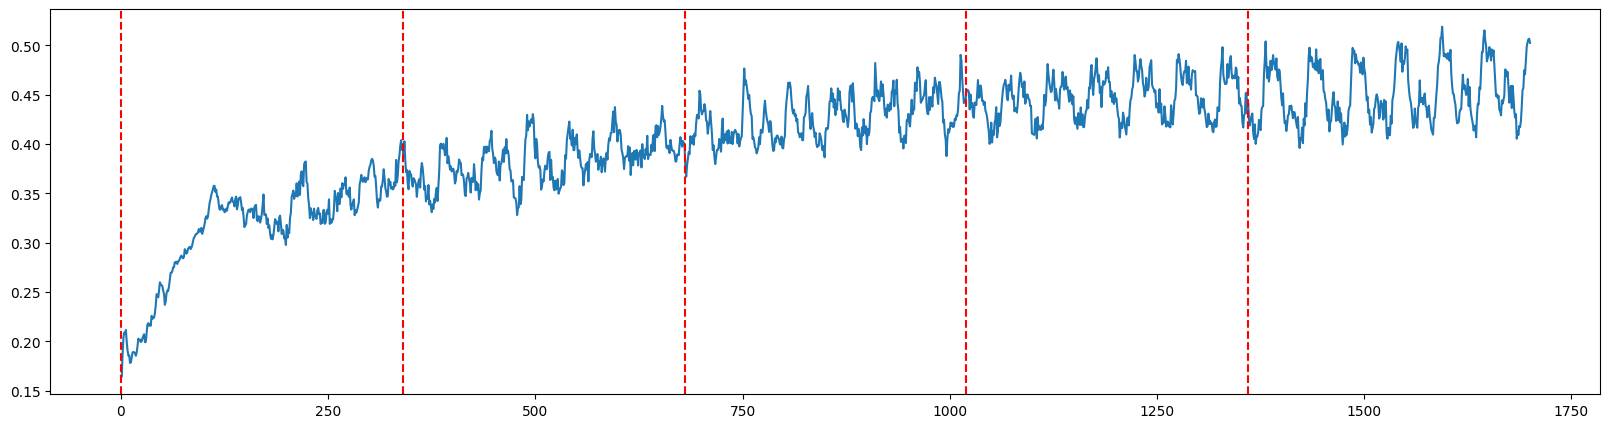

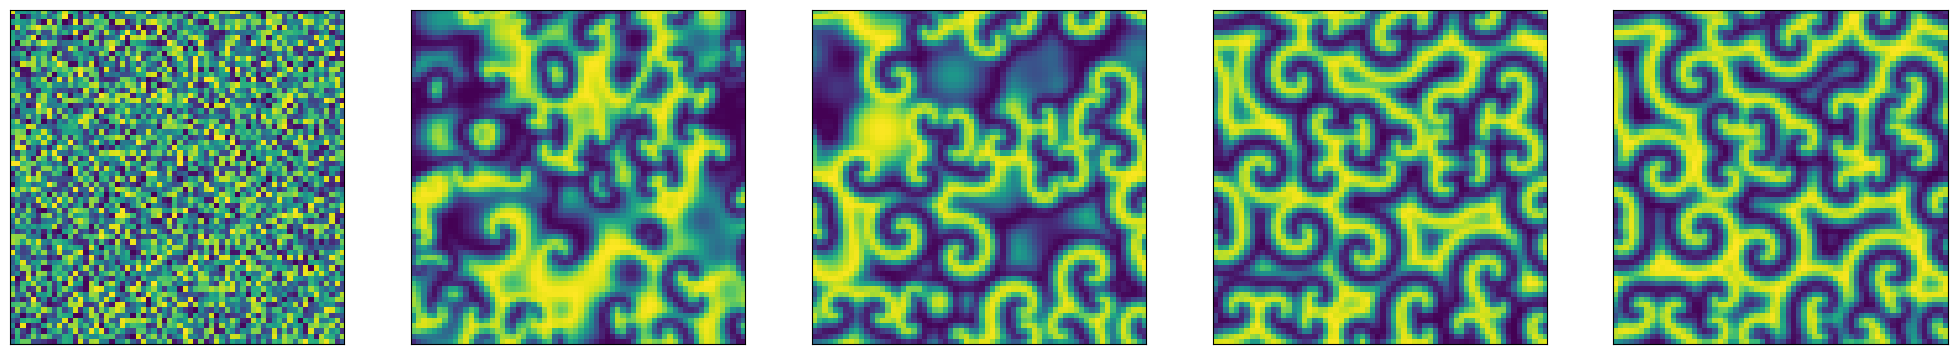

In [ ]:
n = 5

plt.figure(figsize=(20,5))
plt.plot(withoutNoise)
for i in range(n):
  plt.axvline(i*len(data)//n,color='red',ls='--')
plt.show()

plt.figure(figsize=(n*5,5))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(data[i*len(data)//n])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
data = np.load('add_m32.npy').astype(float)
additiveNoise = []
for i in tqdm.tqdm(range(len(data))):
  additiveNoise.append(ga(data[i]))

100%|██████████| 1701/1701 [03:38<00:00,  7.79it/s]


In [ ]:
additiveNoise = pd.DataFrame(additiveNoise)

In [ ]:
additiveNoise.to_csv("additiveNoiseG2-32.csv")

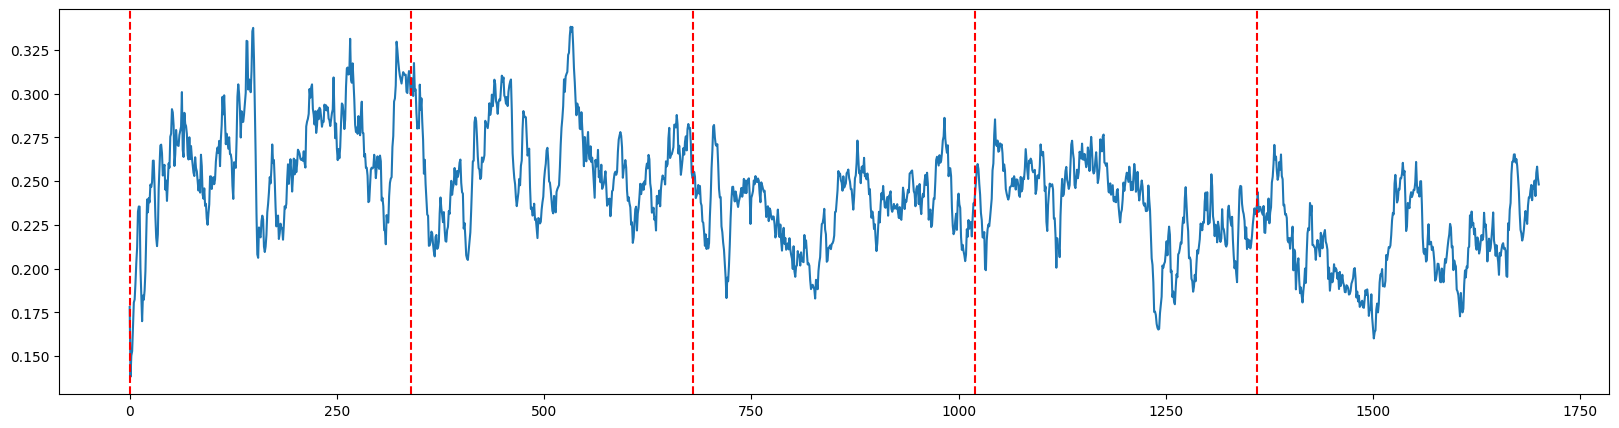

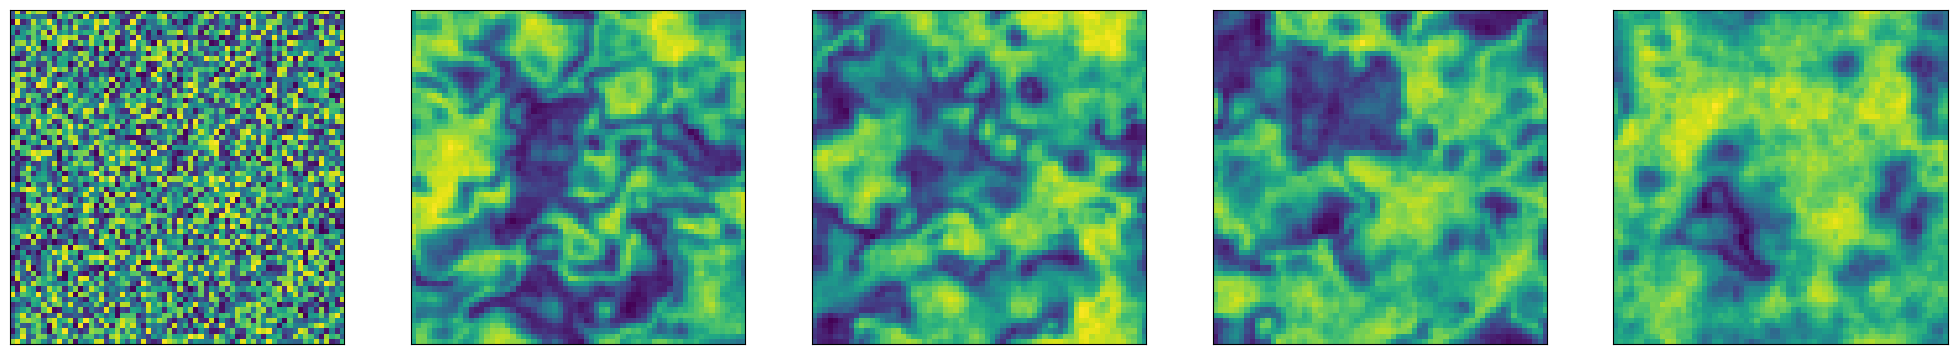

In [ ]:
n = 5

plt.figure(figsize=(20,5))
plt.plot(additiveNoise)
for i in range(n):
  plt.axvline(i*len(data)//n,color='red',ls='--')
plt.show()

plt.figure(figsize=(n*5,5))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(data[i*len(data)//n])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
data = np.load('mul_m32.npy').astype(float)
multiplicativeNoise = []
for i in tqdm.tqdm(range(len(data))):
  multiplicativeNoise.append(ga(data[i]))

100%|██████████| 1701/1701 [03:30<00:00,  8.10it/s]


In [ ]:
multiplicativeNoise = pd.DataFrame(multiplicativeNoise)

In [ ]:
multiplicativeNoise.to_csv("multiplicativeNoiseG2-32.csv")

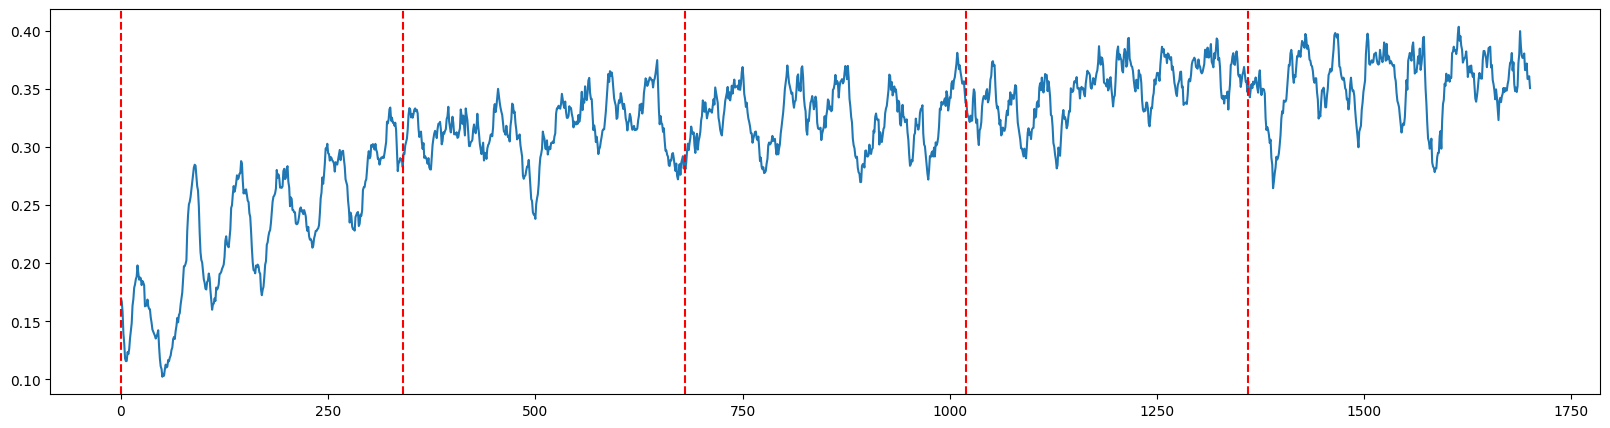

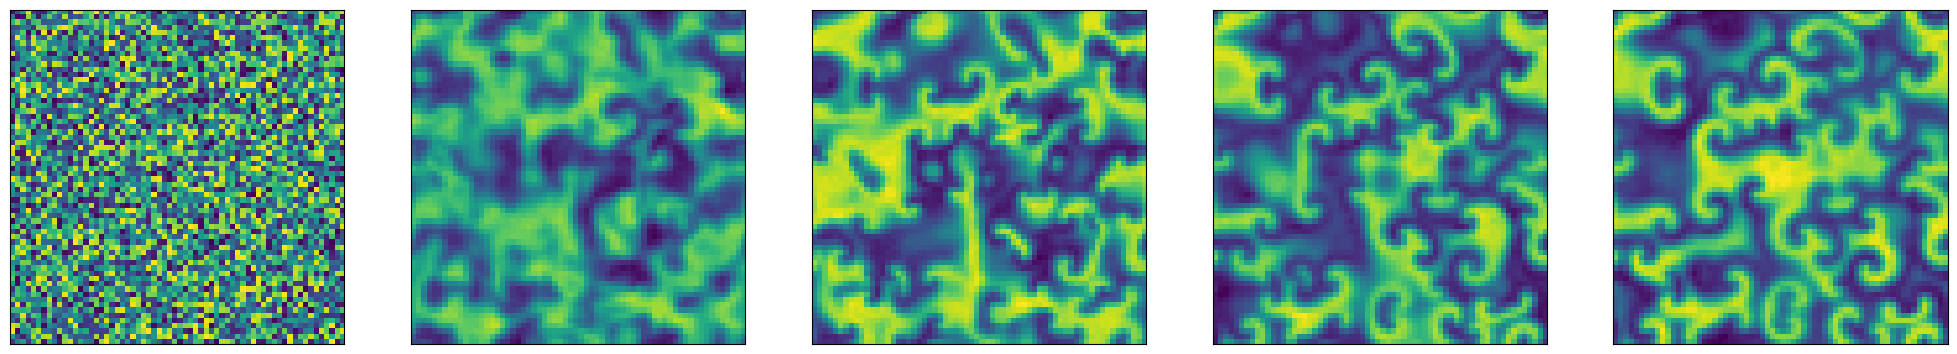

In [ ]:
n = 5

plt.figure(figsize=(20,5))
plt.plot(multiplicativeNoise)
for i in range(n):
  plt.axvline(i*len(data)//n,color='red',ls='--')
plt.show()

plt.figure(figsize=(n*5,5))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(data[i*len(data)//n])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [ ]:
all = pd.DataFrame()
all['w'] = withoutNoise['G2']
all['a'] = additiveNoise['G2']
all['m'] = multiplicativeNoise['G2']
all.to_csv('GPA_allCGL.csv')
all

w         a         m
0     0.165010  0.178107  0.169813
1     0.164217  0.138265  0.167012
2     0.187205  0.150332  0.158080
3     0.203702  0.152929  0.139409
4     0.208941  0.167784  0.130973
...        ...       ...       ...
1696  0.498582  0.241513  0.371936
1697  0.502978  0.254731  0.358624
1698  0.506111  0.258325  0.359059
1699  0.506812  0.251858  0.360976
1700  0.502631  0.248159  0.350778

[1701 rows x 3 columns]

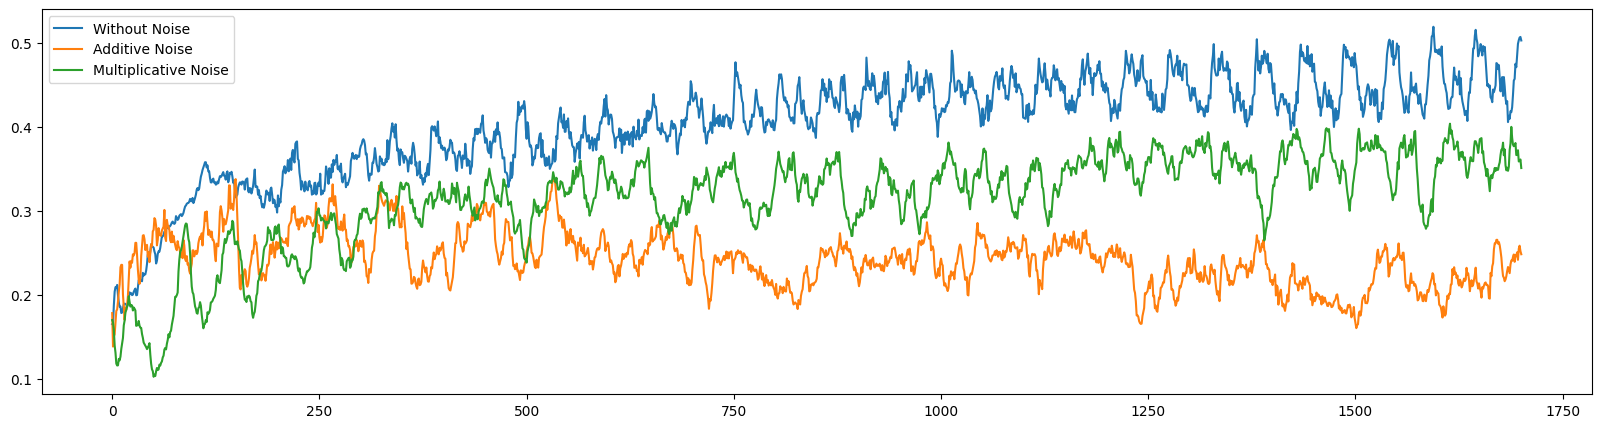

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(all['w'], label='Without Noise')
plt.plot(all['a'], label='Additive Noise')
plt.plot(all['m'], label='Multiplicative Noise')
plt.legend()
plt.show()

## 3.1 Tasks

1. To discern the impact of noise terms in a system, is it imperative to account for time or can a single snapshot provide sufficient information to distinguish between additive and multiplicative noise?

2. What is the distribution of a Bayesian Neural Network (BNN) trained without considering any temporal relations?

3. Since the initial condition is always random, how does it influence the BNN? At which time-step can the classes be distinguished?

4. How the normalization impact the BNN?




# 4. SDSS + Galaxy Zoo 1

In this section, we present a GPA  f the Sloan Digital Sky Survey (SDSS) DR7 images of objects classified in Galaxy Zoo 1. The data has been converted to '.jpeg' images, resulting in a loss of some information and structural details compared to our previous works.

## 4.1 Pre-processing
Pre-processing is a critical task in data mining that can require a significant amount of time and effort. This stage typically includes data acquisition and cleaning, among other tasks. To give an idea of the time involved in each step of data mining pre-processing, we present the following chart showing the average duration of each step
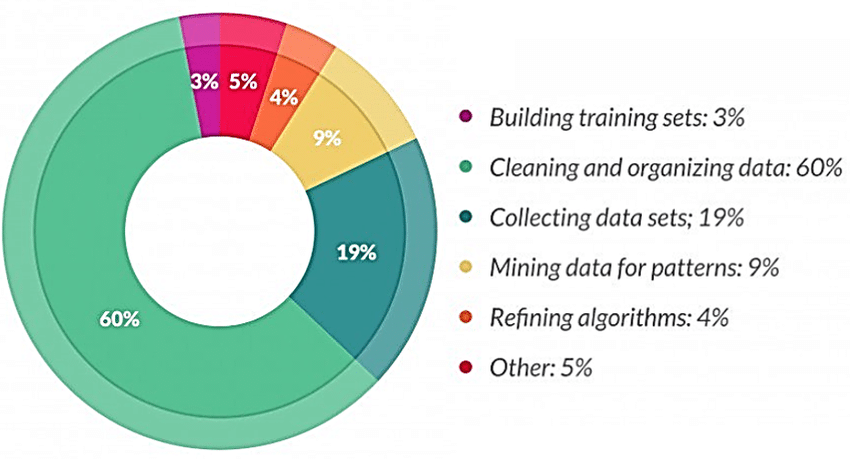

**Source:** [Sarih, et al.(2019)](https://www.researchgate.net/publication/335577003_Data_preparation_and_preprocessing_for_broadcast_systems_monitoring_in_PHM_framework)




To acquire the SDSS images, one can manually download [here](https://skyserver.sdss.org/dr18/). The following script was adapted from [this](https://github.com/shilpakancharla/galaxy-image-classification) repository.

In [ ]:
'''
Original code:
https://github.com/shilpakancharla/galaxy-image-classification
'''
import os
import ssl
import urllib.request
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u

"""
    Get the right ascenscion (RA) and declination (DEC) degree values from the .csv file. We also drop
    the values for which the debiased values of either the elliptical galaxy probability or spiral
    galaxy probability is less than 0.8.
    @param df: dataframe containing the degree coordinates
    @return dataframe containing the object ID, ra, and dec values from the .csv file with debiased
            values greater than 0.8 (we also keep the debiased probability columns)
"""
def drop_items(df):
    # Drop the values for which the debiased threshold is less than 0.8
    df = df[(df['P_EL_DEBIASED'] >= 0.8) | (df['P_CS_DEBIASED'] >= 0.8)]
    # Drop instances where 'UNCERTAIN' == 1 (only want elliptical and spiral from this dataset)
    df = df[(df['UNCERTAIN'] == 0)]

    # Now drop unecessary columns for gathering data
    df = df.drop(columns = ['NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE', 'P_DK', 'P_MG',
                            'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'UNCERTAIN'])

    # Results in dataframe of [NUMBER_GALAXIES rows x 5(ID, ra, dec, spiral, elliptical) columns]
    return df.reset_index(drop = True)

"""
    Convert the original right ascenscion (RA) and declination (DEC) values from the .csv file
    which are in degrees to decimal units.
    @param ra: right ascenscion (RA) degree
    @param dec: declination (DEC) degree
    @return celestial coordinate in decimal units
"""
def convert_to_dec(ra, dec):
    dec_coord = SkyCoord(ra = ra, dec = dec, unit = (u.hourangle, u.deg))
    coordinates = dec_coord.to_string('decimal').split(' ')
    ra = coordinates[0]
    dec = coordinates[1]
    return ra, dec


def get_images(df, folder=""):
    for idx,obj in df.iterrows():
        objid = obj["OBJID"]
        ra, dec =  convert_to_dec(obj["RA"],obj["DEC"])
        filename = folder+str(objid) + '.jpg'

        # Replace the ra and dec coordinates in the URL, downloading in 512 x 512 resolution
        try:
            image_url = "http://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?ra=" + str(ra) + "&dec=" + str(dec) + "&scale=0.15&width=512&height=512&opt="
            urllib.request.urlretrieve(image_url, filename)
            # print("ObjID:", objid, "saved at:", filename)
        except:
            print("Image with object ID " + str(objid) + " and coordinates " + str(ra) + ", " + str(dec) + " not found.")
            print(image_url)
            continue

def download(gzooTable, nSp=1024, nEll=1024):
    ell = gzooTable[gzooTable["ELLIPTICAL"] == 1].sample(nEll)
    sp = gzooTable[gzooTable["SPIRAL"] == 1].sample(nSp)
    get_images(ell, "galaxies/elliptical/")
    get_images(sp, "galaxies/spiral/")


To download, we also need a Table of objects, which contain its coordinates (RA and DEC). Here we are downloading the Galaxy Zoo 1 table.

In [ ]:
!wget https://github.com/rsautter/GPA_Tutorial/blob/main/GalaxyZoo1_DR_table2.zip?raw=true -O gzoo1.zip
!unzip gzoo1.zip
!mkdir galaxies/
!mkdir galaxies/elliptical/
!mkdir galaxies/spiral/

--2023-04-28 13:51:48--  https://github.com/rsautter/GPA_Tutorial/blob/main/GalaxyZoo1_DR_table2.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rsautter/GPA_Tutorial/raw/main/GalaxyZoo1_DR_table2.zip [following]
--2023-04-28 13:51:48--  https://github.com/rsautter/GPA_Tutorial/raw/main/GalaxyZoo1_DR_table2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/GalaxyZoo1_DR_table2.zip [following]
--2023-04-28 13:51:48--  https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/GalaxyZoo1_DR_table2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:

In [ ]:
download(pd.read_csv('GalaxyZoo1_DR_table2.csv'),10,10)

## 4.2 GPA

We use the glob library to list all images, and the PILLOW to read the images.

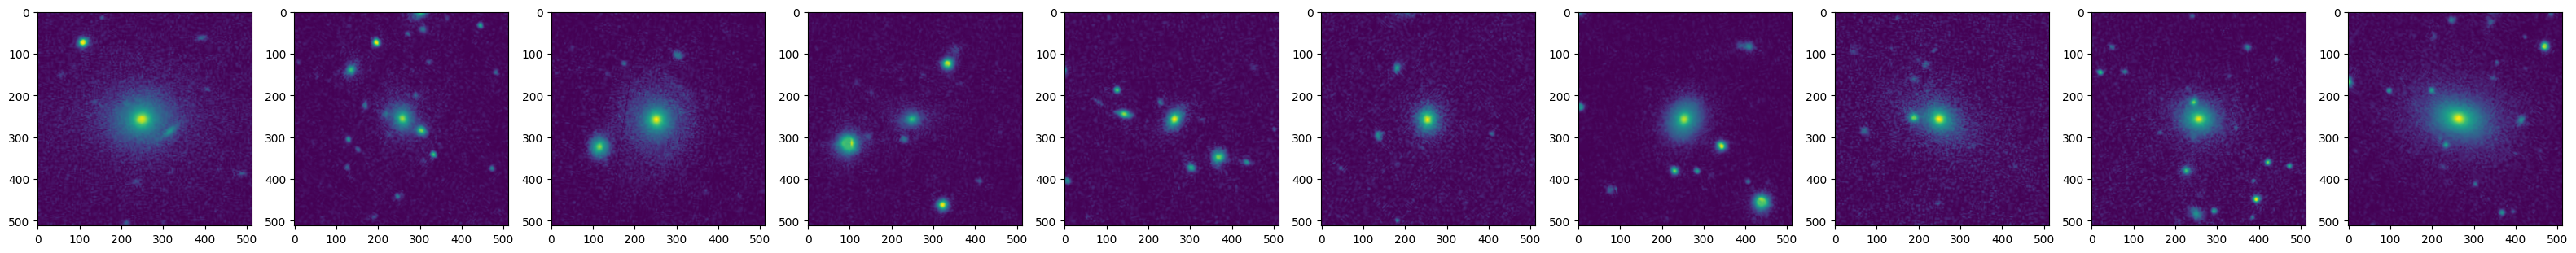

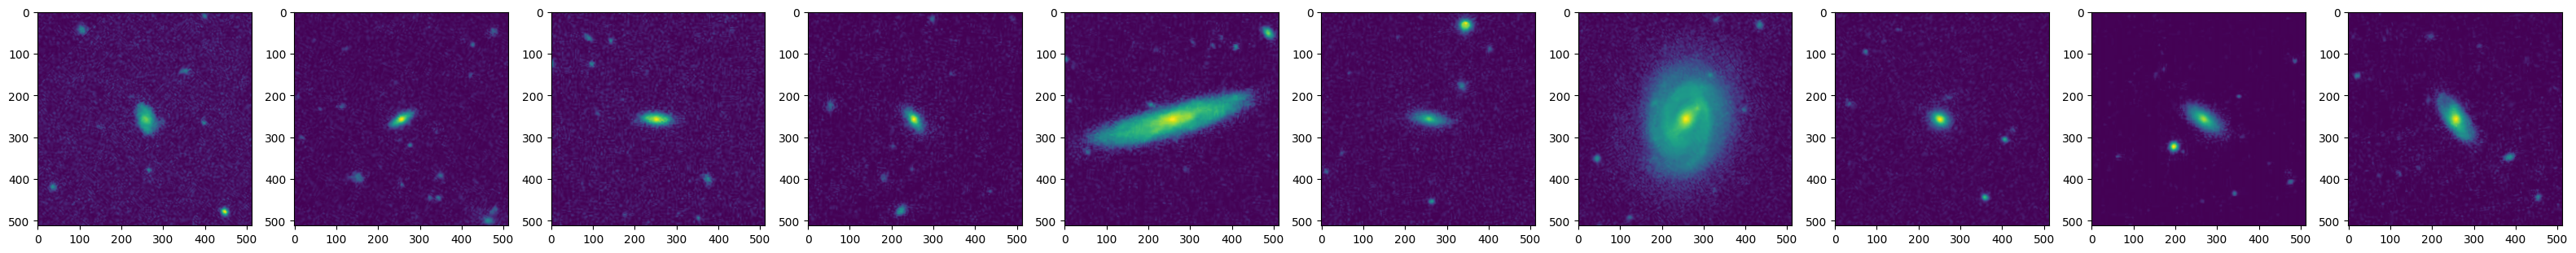

In [ ]:
import glob
import matplotlib.pyplot as plt
from PIL import Image


ells = glob.glob("galaxies/elliptical/*")
sps = glob.glob("galaxies/spiral/*")

# plotting elliptical galaxies
plt.figure(figsize=(len(ells)*4,4))
for i in range(len(ells)):
  plt.subplot(1,len(ells),i+1)
  img = np.array(Image.open(ells[i]).convert('L'))
  plt.imshow(img)
plt.show()
plt.figure(figsize=(len(sps)*4,4))
for i in range(len(sps)):
  plt.subplot(1,len(sps),i+1)
  img = np.array(Image.open(sps[i]).convert('L'))
  plt.imshow(img)

plt.show()

In [ ]:
gell = []
gsp = []

for i in tqdm.tqdm(range(len(ells))):
  img = np.array(Image.open(ells[i]).convert('L')).astype(float)
  gell.append(ga(img,moment=["G1C","G1","G2","G3"]))

for i in tqdm.tqdm(range(len(sps))):
  img = np.array(Image.open(sps[i]).convert('L')).astype(float)
  gsp.append(ga(img,moment=["G1C","G1","G2","G3"]))

100%|██████████| 10/10 [00:55<00:00,  5.55s/it]


In [ ]:
gsp = pd.DataFrame(gsp)
gell = pd.DataFrame(gell)

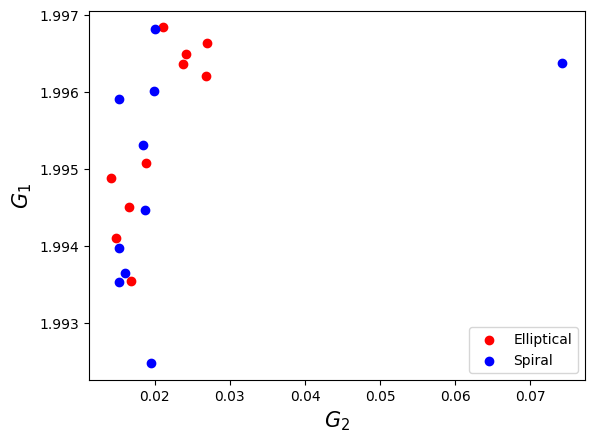

In [ ]:
plt.figure()
plt.scatter(gell['G2'],gell['G1C'],color='r',label='Elliptical')
plt.scatter(gsp['G2'],gsp['G1C'],color='b',label='Spiral')
plt.xlabel(r"$G_2$",fontsize=15)
plt.ylabel(r"$G_1$",fontsize=15)
plt.legend()
plt.show()

## 4.3 GPA of clean data

To improve the model, one can use Sextractor, an astronomy pre-processing toolkit. However, Sextractor reads '.fits' files, which means we need to convert the '.jpeg' files to '.fits' format.

In [ ]:
!apt-get install sextractor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfftw3-single3 source-extractor
Suggested packages:
  libfftw3-bin libfftw3-dev
The following NEW packages will be installed:
  libfftw3-single3 sextractor source-extractor
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,057 kB of archives.
After this operation, 3,545 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfftw3-single3 amd64 3.3.8-2ubuntu1 [756 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 source-extractor amd64 2.25.0+ds-2 [298 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 sextractor all 2.25.0+ds-2 [2,736 B]
Fetched 1,057 kB in 1s (1,079 kB/s)
Selecting previously unselected package libfftw3-single3:amd64.
(Reading database ... 122519 files and directories currently installed.)
Preparing to unpack .../libff

In [ ]:
!mkdir fgalaxies/
!mkdir fgalaxies/elliptical/
!mkdir fgalaxies/spiral/

In [ ]:
from astropy.io import fits

for e in ells:
  img = np.array(Image.open(e).convert('L'))
  hdu = fits.PrimaryHDU(img)
  hdu.writeto("f"+e[:-4]+".fits",overwrite=True)
  print("f"+e[:-4]+".fits")

for s in sps:
  img = np.array(Image.open(s).convert('L'))
  hdu = fits.PrimaryHDU(img)
  hdu.writeto("f"+s[:-4]+".fits",overwrite=True)
  print("f"+s[:-4]+".fits")

fgalaxies/elliptical/587734305954857198.fits
fgalaxies/elliptical/587729231441297771.fits
fgalaxies/elliptical/587742062674116748.fits
fgalaxies/elliptical/587735342651867218.fits
fgalaxies/elliptical/587735694836760710.fits
fgalaxies/elliptical/587725470671700239.fits
fgalaxies/elliptical/587739809952497740.fits
fgalaxies/elliptical/587742775627415638.fits
fgalaxies/elliptical/587739844851925301.fits
fgalaxies/elliptical/587729782810345840.fits
fgalaxies/spiral/587738197196079216.fits
fgalaxies/spiral/587735043081830534.fits
fgalaxies/spiral/588017729762492514.fits
fgalaxies/spiral/587742012738568375.fits
fgalaxies/spiral/587739302602997901.fits
fgalaxies/spiral/587724232109785322.fits
fgalaxies/spiral/587735695381037138.fits
fgalaxies/spiral/587738067808878802.fits
fgalaxies/spiral/587728947442286721.fits
fgalaxies/spiral/587742629596102834.fits


In [ ]:
!wget https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/default.conv
!wget https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/default.sex
!wget https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/default.param

--2023-04-28 13:55:07--  https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/default.conv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88 [text/plain]
Saving to: ‘default.conv’

default.conv        100%[===================>]      88  --.-KB/s    in 0s      

2023-04-28 13:55:07 (2.18 MB/s) - ‘default.conv’ saved [88/88]

--2023-04-28 13:55:07--  https://raw.githubusercontent.com/rsautter/GPA_Tutorial/main/default.sex
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3770 (3.7K) [text/plain]
Saving to: ‘default.sex’

defa

In [ ]:
cells = []
csps = []
for e in ells:
  _ = os.popen("source-extractor "+"f"+e[:-4]+".fits").read()
  mask = []
  with fits.open('check.fits') as hdul:
    mask = hdul[0].data.copy()
  img = np.array(Image.open(e).convert('L'))
  avg, std = np.average(img[mask==0]), np.std(img[mask==0])
  objid = mask[256,256]
  for i in range(len(mask)):
    for j  in range(len(mask[i])):
      if (mask[i,j] !=0) & (mask[i,j] != objid):
        img[i,j] = np.random.normal(avg,std)
  #img[(mask!=objid)& (mask!=0)] = np.random.normal(avg,std)
  img = img.astype(float)
  cells.append(img)

for s in sps:
  _ = os.popen("source-extractor "+"f"+s[:-4]+".fits").read()
  mask = []
  with fits.open('check.fits') as hdul:
    mask = hdul[0].data.copy()
  img = np.array(Image.open(s).convert('L'))
  avg, std = np.average(img[mask==0]), np.std(img[mask==0])
  objid = mask[256,256]
  for i in range(len(mask)):
    for j  in range(len(mask[i])):
      if (mask[i,j] !=0) & (mask[i,j] != objid):
        img[i,j] = np.random.normal(avg,std)
  img = img.astype(float)
  csps.append(img)

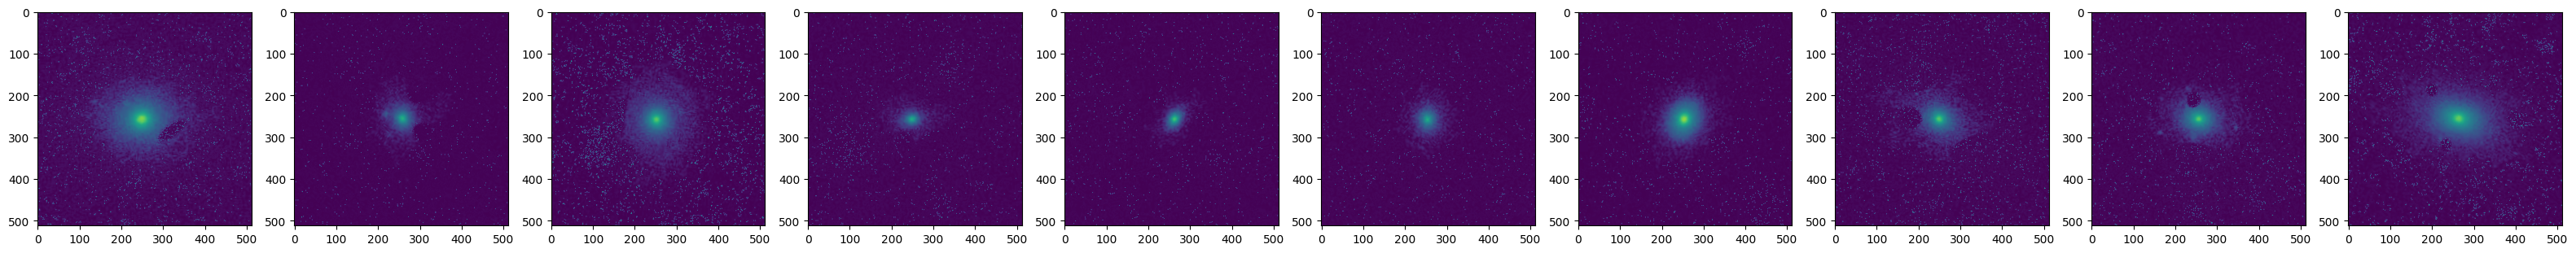

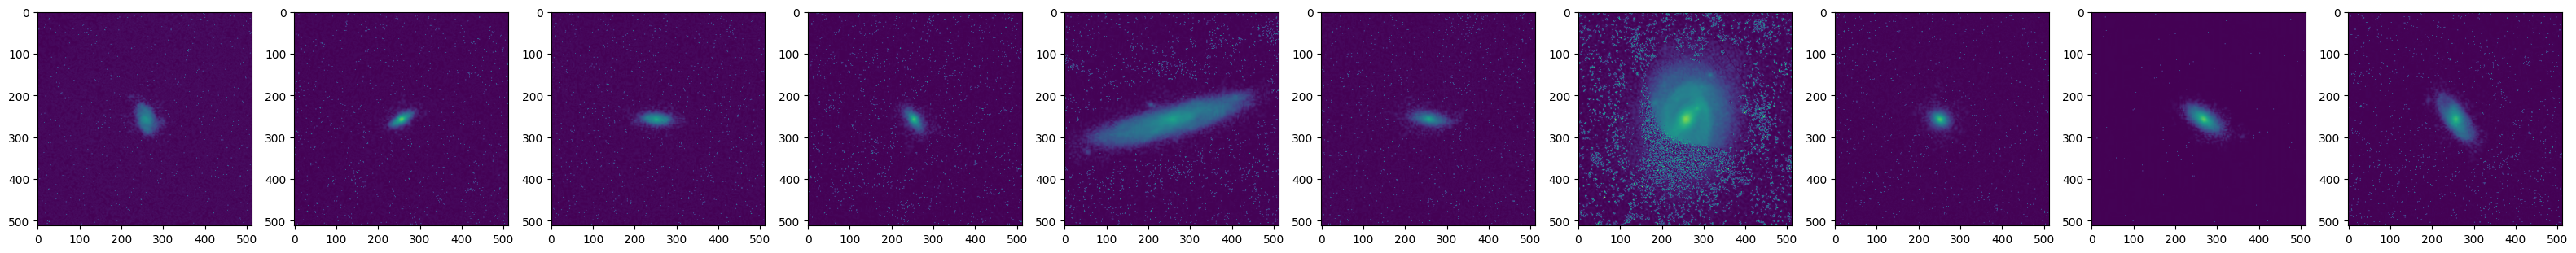

In [ ]:
plt.figure(figsize=(len(cells)*4,4))
for i in range(len(cells)):
  plt.subplot(1,len(cells),i+1)
  plt.imshow(cells[i])
plt.show()

plt.figure(figsize=(len(csps)*4,4))
for i in range(len(csps)):
  plt.subplot(1,len(csps),i+1)
  plt.imshow(csps[i])
plt.show()

In [ ]:
gell = []
gsp = []

for i in tqdm.tqdm(range(len(cells))):
  gell.append(ga(cells[i],moment=["G1C","G1","G2","G3"]))

for i in tqdm.tqdm(range(len(csps))):
  gsp.append(ga(csps[i],moment=["G1C","G1","G2","G3"]))

100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


In [ ]:
gsp = pd.DataFrame(gsp)
gell = pd.DataFrame(gell)

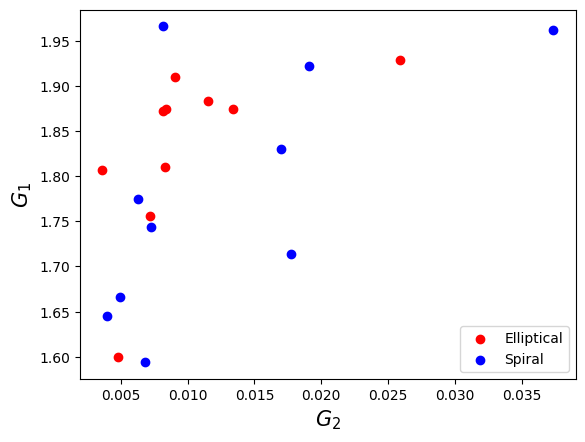

In [ ]:
plt.figure()
plt.scatter(gell['G2'],gell['G1C'],color='r',label='Elliptical')
plt.scatter(gsp['G2'],gsp['G1C'],color='b',label='Spiral')
plt.xlabel(r"$G_2$",fontsize=15)
plt.ylabel(r"$G_1$",fontsize=15)
plt.legend()
plt.show()

# 5. Extragalactic Radio Sources


In [ ]:
!wget https://github.com/AbdollahMasoud/IJCNN-2023/blob/main/Dataset.zip?raw=true -O ers.zip

--2023-04-28 03:30:18--  https://github.com/AbdollahMasoud/IJCNN-2023/blob/main/Dataset.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AbdollahMasoud/IJCNN-2023/raw/main/Dataset.zip [following]
--2023-04-28 03:30:18--  https://github.com/AbdollahMasoud/IJCNN-2023/raw/main/Dataset.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AbdollahMasoud/IJCNN-2023/main/Dataset.zip [following]
--2023-04-28 03:30:18--  https://raw.githubusercontent.com/AbdollahMasoud/IJCNN-2023/main/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
!unzip ers.zip

In [ ]:
fr0 = glob.glob("FR0/*")
fri = glob.glob("FRI/*")
frii = glob.glob("FRII/*")

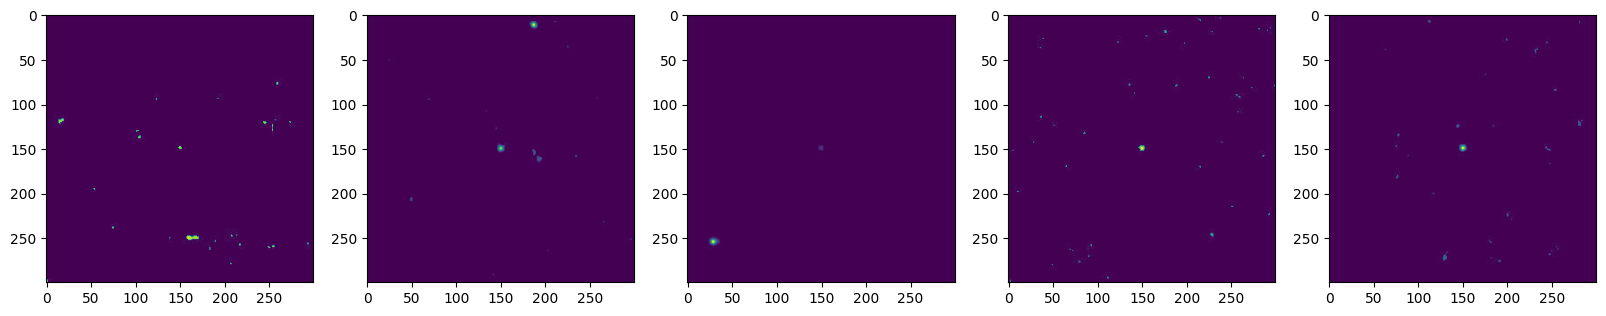

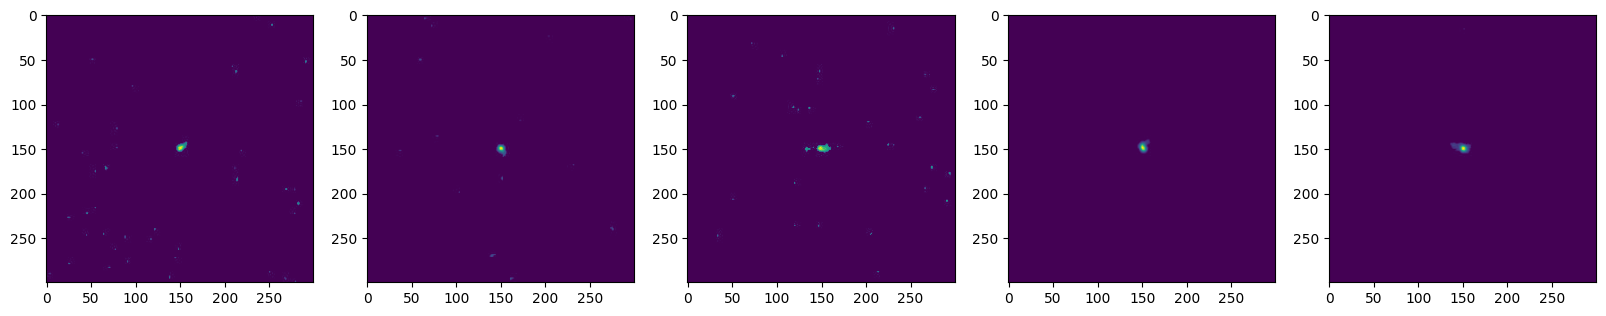

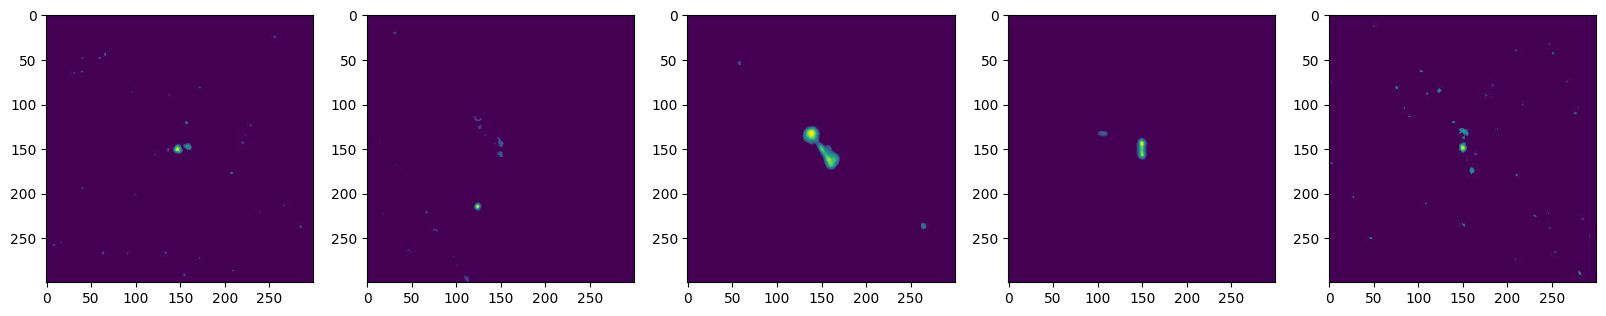

In [ ]:
plt.figure(figsize=(20,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  img = np.array(Image.open(fr0[i]).convert('L')).astype(float)
  plt.imshow(img)
plt.show()

plt.figure(figsize=(20,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  img = np.array(Image.open(fri[i]).convert('L')).astype(float)
  plt.imshow(img)
plt.show()

plt.figure(figsize=(20,4))
for i in range(5):
  plt.subplot(1,5,i+1)
  img = np.array(Image.open(frii[i]).convert('L')).astype(float)
  plt.imshow(img)
plt.show()

# References

[\[1\]](https://www.worldscientific.com/doi/abs/10.1142/S0129183199000103) Rosa, R. R., Sharma, A. S., & Valdivia, J. A. (1999). Characterization of asymmetric fragmentation patterns in spatially extended systems. International Journal of Modern Physics C, 10(01), 147-163.

[\[2\]](https://academic.oup.com/mnrasl/article/477/1/L101/4961142?login=false) Rosa, R. R., De Carvalho, R. R., Sautter, R. A., Barchi, P. H., Stalder, D. H., Moura, T. C., ... & Ferreira, N. C. (2018). Gradient pattern analysis applied to galaxy morphology. Monthly Notices of the Royal Astronomical Society: Letters, 477(1), L101-L105.

[\[3\]](https://www.sciencedirect.com/science/article/abs/pii/S2213133719300757?casa_token=CS8qXd8FddkAAAAA:K9NcpE66efPWIcQL0vXA8eelUq6N3TT6QVa1jEcMANjqX3zCVHuIGvGpILItHeweXFOsVeyugUo) Barchi, P. H., de Carvalho, R. R., Rosa, R. R., Sautter, R. A., Soares-Santos, M., Marques, B. A., ... & Moura, T. C. (2020). Machine and Deep Learning applied to galaxy morphology-A comparative study. Astronomy and Computing, 30, 100334

[\[4\]](https://aas.aanda.org/articles/aas/ps/1996/08/ds1060.ps.gz) Bertin, E., & Arnouts, S. (1996). SExtractor: Software for source extraction. Astronomy and astrophysics supplement series, 117(2), 393-404.

[\[5\]](https://books.google.com.br/books?hl=en&lr=&id=YafMBQAAQBAJ&oi=fnd&pg=PA213&dq=galaxy+zoo+1&ots=fpbFjcJSfs&sig=C5WRHCrV6iZx6XtDXbFtlXNqh5Q&redir_esc=y#v=onepage&q=galaxy%20zoo%201&f=false)Fortson, L., Masters, K., Nichol, R., Edmondson, E. M., Lintott, C., Raddick, J., & Wallin, J. (2012). Galaxy zoo. Advances in machine learning and data mining for astronomy, 2012, 213-236.

